In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

in the following is the function i created from scratch for a simple linear regression

In [2]:
#theta -> vector of prams , starts at [0,0,0]
#alpha -> the learning rate
#x -> vector of features 
#b -> the bias
#y -> the target 
#func -> the prediction 


def func(theta,b,X):
    return np.dot(X,theta) + b

def cost_func(theta,b,X,target):
    return np.sum((func(theta, b, X) - target) ** 2) / (2 * len(target))

def Linreg(X,y,alpha=0.01, epsilon=1e-6,max_iter=1000) :
    m = len(X)
    theta = np.zeros(X.shape[1])
    b = 0
    #while cost more than epsilon
    for _ in range(max_iter) :
        predictions = func(theta, b, X)
        
        d_theta = (1/m) * np.dot(X.T, (predictions - y))
        d_b = (1/m) * np.sum(predictions - y)
        
        theta -= alpha * d_theta
        b -= alpha * d_b

        if cost_func(theta,b,X,y) < epsilon :
            break

    return theta,b

Create a dataset using y = 3x + 5 + noise
didnt master the numpy and pandas libraries that much yet so i used gpt for this part

In [ ]:

np.random.seed(125)
X = 2 * np.random.rand(100, 1) 
y = 3 * X[:, 0] + 5 + np.random.randn(100) * 0.5  # y = 3x + 5 + noise


X = X.reshape(-1, 1)


alpha = 0.1
epsilon = 1e-6
theta, b = Linreg(X, y, alpha, epsilon, max_iter=1000)


print(f"Estimated theta: {theta}")
print(f"Estimated bias: {b}")

# Expected values: theta ≈ 3, b ≈ 5



Estimated theta: [3.07356822]
Estimated bias: 4.919518129590955


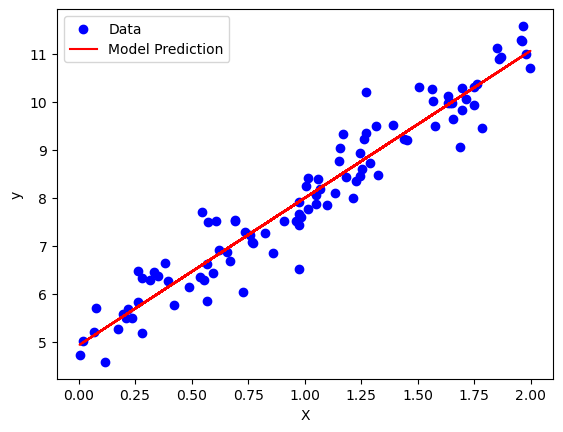

In [4]:
# Plot results
plt.scatter(X, y, color="blue", label="Data")
plt.plot(X, func(theta, b, X), color="red", label="Model Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

this is to try it on a real word problem , used the help of ai in ploting

In [5]:
# Load dataset
data = load_diabetes()
X = data.data
y = data.target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
theta, b = Linreg(X_train, y_train, alpha=0.1, epsilon=1e-6, max_iter=5000)

# Predict house prices
y_pred = func(theta, b, X_test)

# Choose two important features (RM = feature index 5, LSTAT = feature index 12)
feature_names = data.feature_names



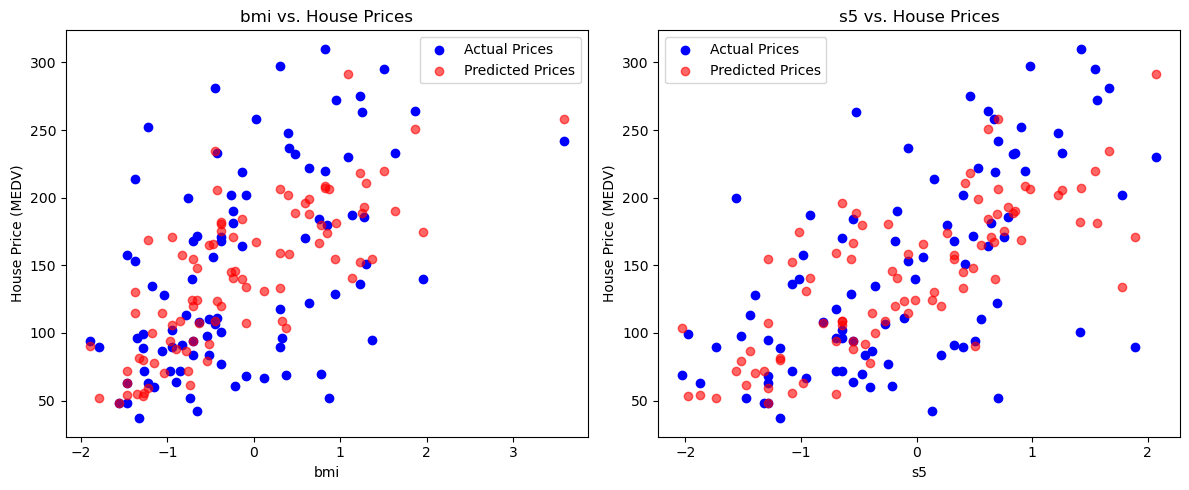

In [6]:
# Scatter Plot 1: RM vs. MEDV
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 2], y_test, color="blue", label="Actual Prices")
plt.scatter(X_test[:, 2], y_pred, color="red", label="Predicted Prices", alpha=0.6)
plt.xlabel(feature_names[2])  # 'BMI' in this dataset
plt.ylabel("House Price (MEDV)")
plt.title(f"{feature_names[2]} vs. House Prices")
plt.legend()

# Scatter Plot 2: LSTAT vs. MEDV
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 8], y_test, color="blue", label="Actual Prices")
plt.scatter(X_test[:, 8], y_pred, color="red", label="Predicted Prices", alpha=0.6)
plt.xlabel(feature_names[8])  # 'S5' in this dataset
plt.ylabel("House Price (MEDV)")
plt.title(f"{feature_names[8]} vs. House Prices")
plt.legend()

plt.tight_layout()
plt.show()